# Seaborn plotting guide and examples: 
The purpose of this iPython notebook is to guide the users on effective and efficient use of Seaborn plotting library. 

Seaborn is available at http://seaborn.pydata.org/
And most of the examples can be seen at the gallery section of the website. 
Most of the examples shown below are straight copies from Seaborn website, with a lot of additions made to it using example datasets. The example files will have to be present with the user before use.  

Installation instructions: Seaborn cannot be installed easily using pip. A more optimum way of installation is to type on command line: "conda install seaborn" and then follow instructions on the prompt.  

In [118]:
from matplotlib import style
import seaborn as sns
sns.set(style='ticks', palette='RdBu')
import pandas as pd
import numpy as np
import time
import datetime 
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 1000
from time import gmtime, strftime
Time_now = strftime("%Y-%m-%d %H:%M:%S", gmtime())
import timeit
start = timeit.default_timer()
pd.options.display.max_rows = 100

In [119]:
# The command matplotlib inline is necessary to plot all the plots in the body of the iPython notebook. 
%matplotlib inline

In [120]:
path = 'C:/Users/rmalshe/Desktop/CareerDevelopment/PROGRAMMING_LANGUAGES/iPythonNotebooks/'

# First, just describe the data and see how they look like. What their averages, standard deviations are. 

In [121]:
df = pd.read_csv(path+'HR_comma_sep.csv')
df.head()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0



# Pivot Tables: 
A very good website to learn pivot tables and their use is:
http://pbpython.com/pandas-pivot-table-explained.html

In [122]:
df_jobtype = pd.pivot_table(df,
                        values = ['satisfaction_level', 
                                  'last_evaluation'],
                        index = ['sales'],
                        columns = [],aggfunc=[np.mean], 
                        margins=True).fillna('')

cm = sns.light_palette("green", as_cmap=True)
df_jobtype.style.background_gradient(cmap=cm)

Note in the below, that the sns.factorplot has been used recursively for all the categories in the df['sales'] column. 

There are majorly 36 different types of plots one can make with Seaborn: 
    These are listed as: 
        
        sns.lmplot(X, Y)
        
        sns.barplot(X, Y)
           
        sns.kdeplot(X, Y) 
        
        sns.distplot(X, Y)
        
        sns.violinplot(X, Y)
        
        sns.FacetGrid(X, Y)
        
        sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), size=4.5,
                  sharex=False, sharey=False, despine=False)
                  
        sns.factorplot(X, Y)
        
        sns.boxplot(X, Y)
        
        sns.violinplot(X, Y)
        
        sns.heatmap(data)
        
        sns.jointplot(X, Y)
        
        sns.barplot(X, Y)
        
        sns.stripplot(X, Y)
        
        sns.interactplot("x1", "x2", "y")
        
        sns.FacetGrid(X, Y)
        
        sns.heatmap(corr)
        
        sns.JointGrid(X, Y)
        
        sns.kdeplot(X, Y)
        
        sns.PairGrid(data)
        
        sns.PairGrid(titanic, y_vars="survived",
                 x_vars=["class", "sex", "who", "alone"],
                 size=5, aspect=.5)
                 
        sns.residplot(X, y) 
        
        sns.swarmplot(X, Y)

        sns.pairplot(df)
        
        sns.clustermap(df.corr())
        

# How to figure out a plotting style?

1. First imagine what plot style would look the best
2. Then decide which variables will be plotted on X, and Y
3. Choose one style and try out a plot by pasting sns.{that-plot-style}(X, Y, choose options by clicking shift + tab, and choose them correctly. 
4. Put this line on the top of every figure so that the size is manipulated easily f, ax = plt.subplots(figsize=(10,10))
5. Some plots are better made by iteration and recursion, for example, check above how factor plots are made for various categories. This is a simple and easy enough way to visualize multi dimensional data. 
6. Problems? Google them, and look for how others have solved them. 

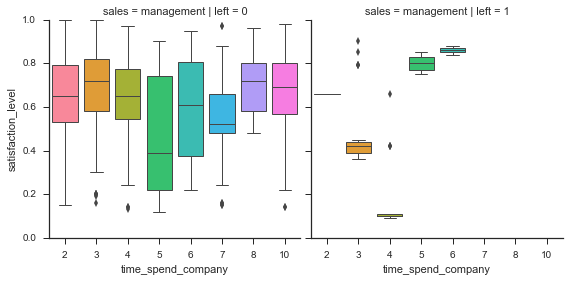

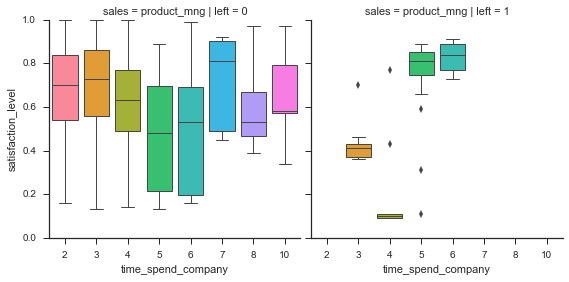

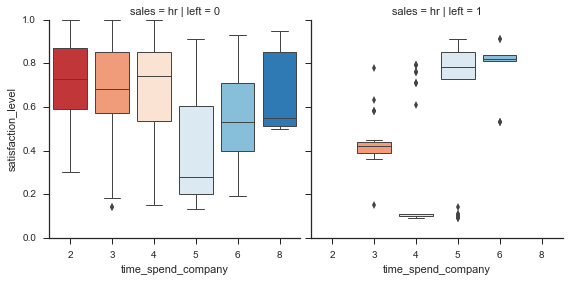

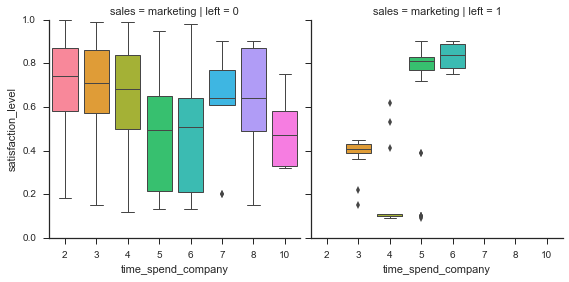

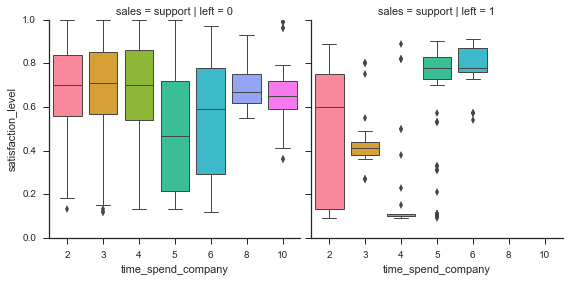

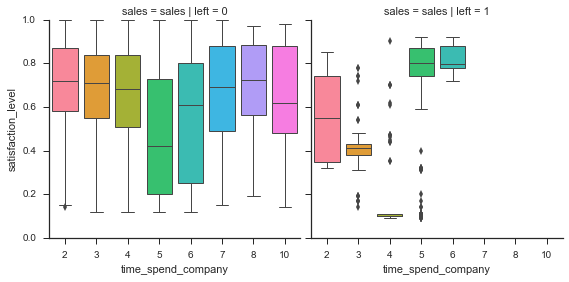

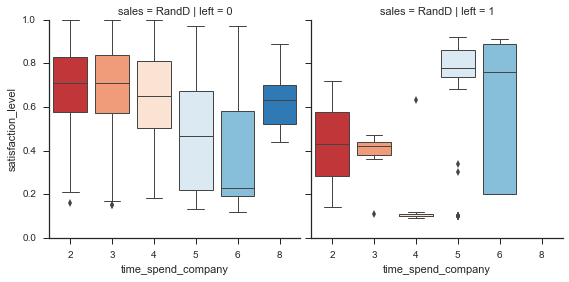

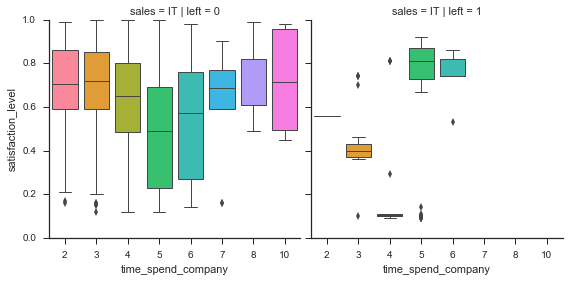

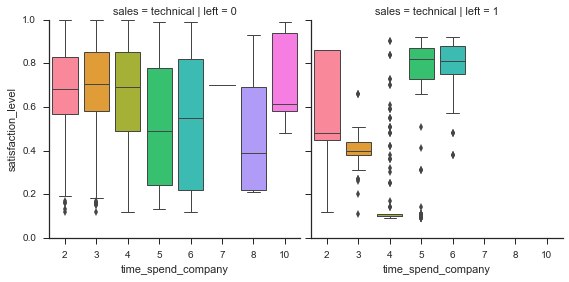

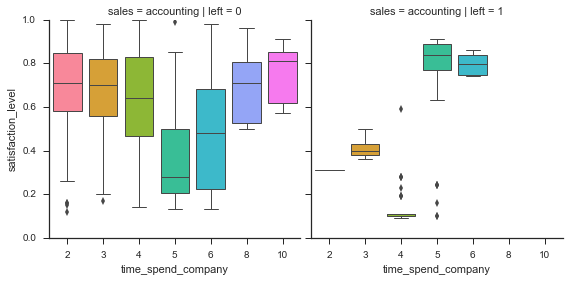

In [123]:
for i in set(df['sales']):
    aa= df[df['sales'].isin([i])]
    g = sns.factorplot(x='time_spend_company', y="satisfaction_level",data=aa, 
                   saturation=1, kind="box", col = 'left', row = 'sales',
                   ci=None, aspect=1, linewidth=1) 

# Violin plot

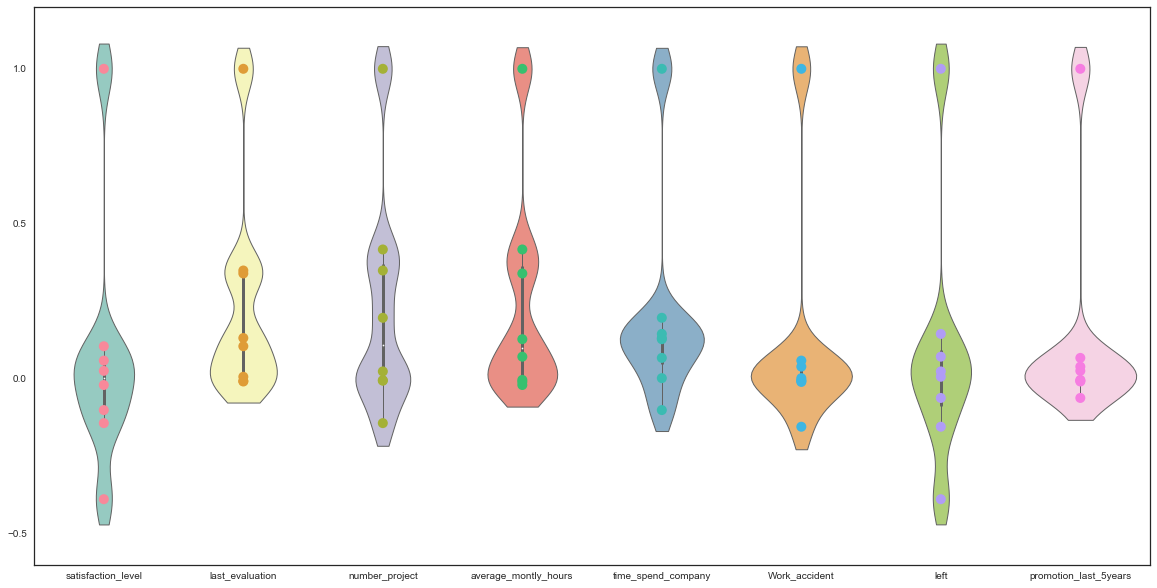

In [137]:
corr_df = df.corr()
plt.figure(figsize=(20,10))
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)
sns.stripplot(data=corr_df, size=10)


In [125]:
corr_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


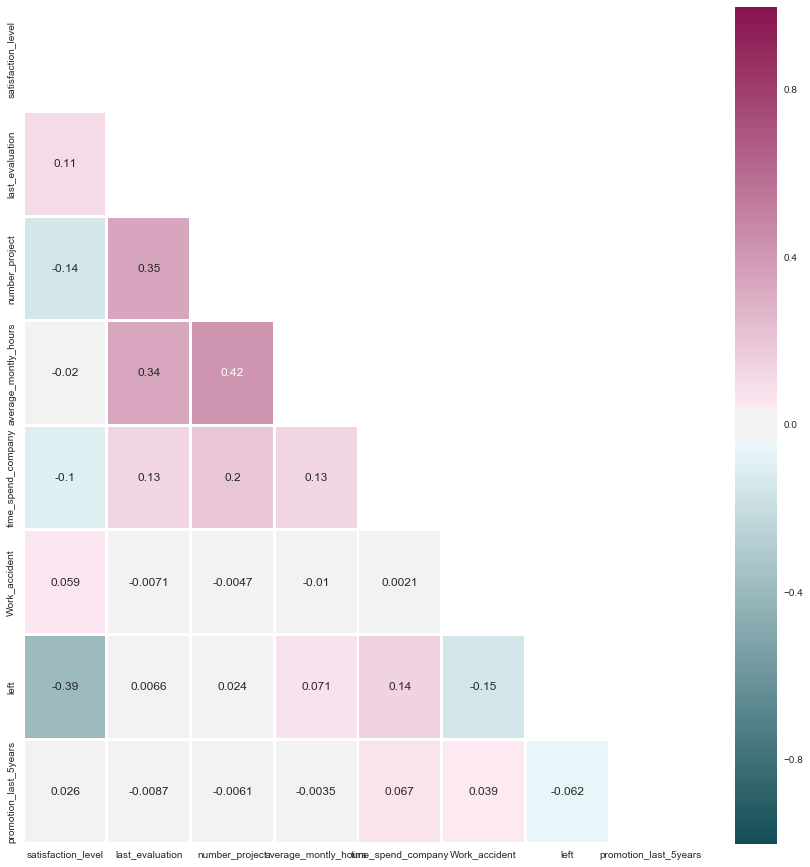

In [144]:
def heat_map(corrs_mat):
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(15, 15))
    mask = np.zeros_like(corrs_mat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True 
    # Generate a custom diverging colormap
    #cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corrs_mat, mask=mask, cmap=cmap, ax=ax, linecolor='white', linewidths=2, annot=True)
    
heat_map(corr_df)  

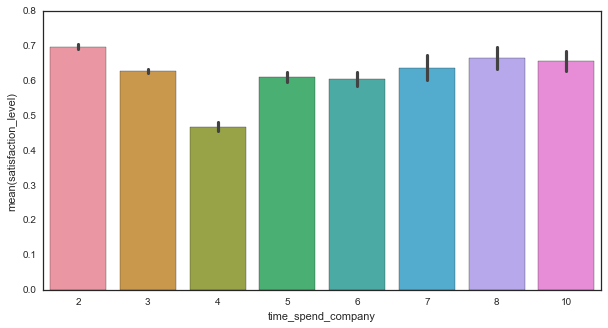

In [127]:
X = df.time_spend_company
Y = df.satisfaction_level
f, ax = plt.subplots(figsize=(10,5))
sns.barplot(X, Y)

# Heatmap of a clustermap

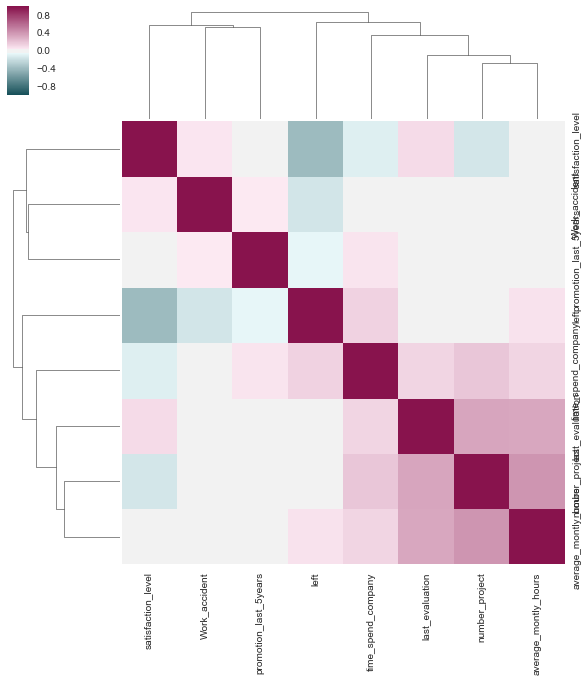

In [143]:
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True, center="light")
sns.clustermap(df.corr(), cmap=cmap)


# Heatmap of a pivot table

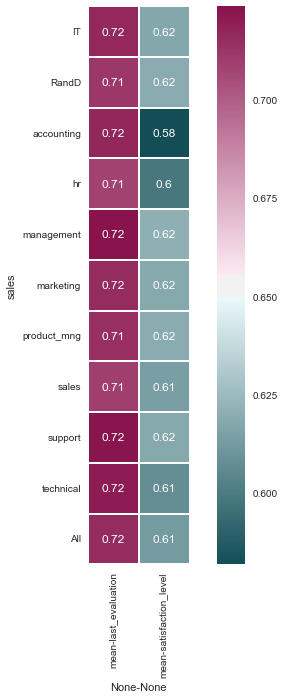

In [129]:
f, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True, center="light")
sns.heatmap(df_jobtype, 
            annot=True, 
            linewidths=1, 
            linecolor='white', 
            cbar=True, 
            center=None, 
            square=True, cmap=cmap, )

# Pairplot

In [146]:
df_small = df[['satisfaction_level', 
               'last_evaluation', 
               'number_project',
               #'average_montly_hours', 
               #'time_spend_company', 
               #'Work_accident',
               'left', 
               'promotion_last_5years', 
               'sales', 
               'salary']]

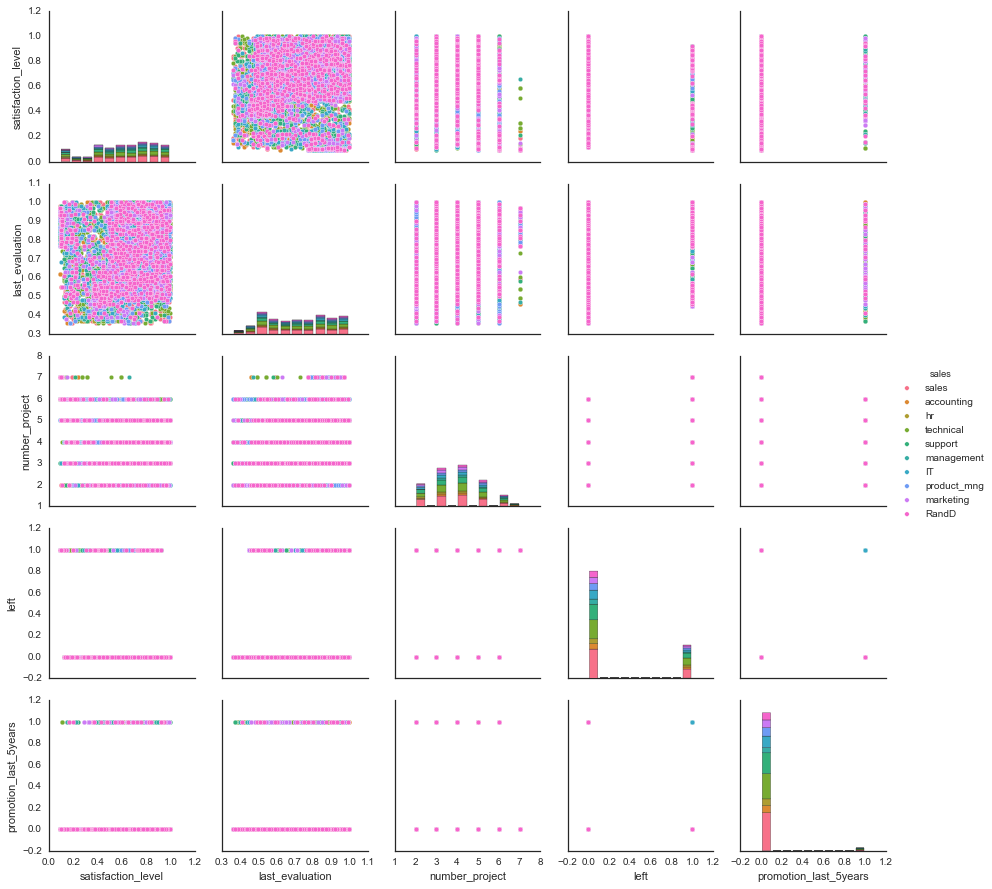

In [147]:
sns.pairplot(df_small,kind='scatter', diag_kind='hist', hue='sales')

In [131]:
df.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'sales', 'salary'], dtype=object)

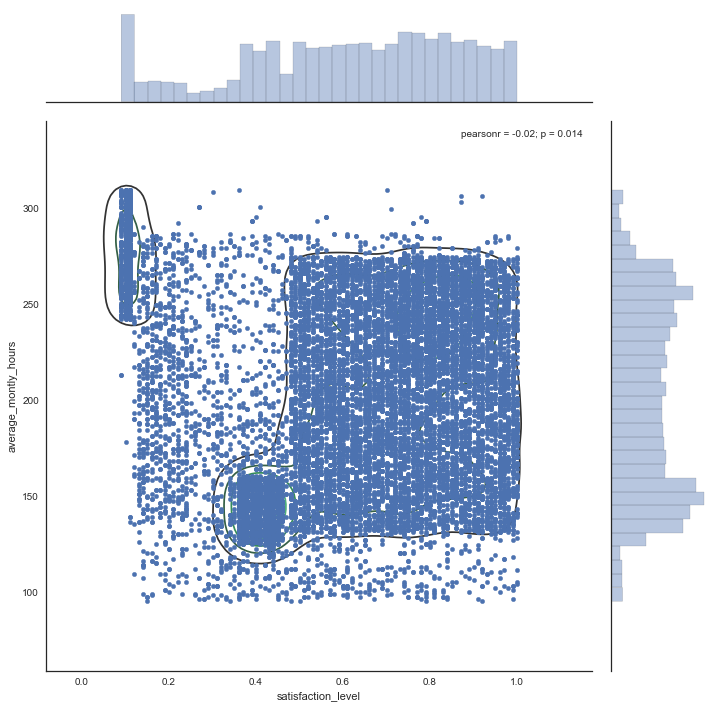

In [132]:
sns.jointplot("satisfaction_level", 
              "average_montly_hours", 
              data=df, 
              size=10, 
              kind='scatter',).plot_joint(sns.kdeplot, 
                                         zorder=0, 
                                         n_levels=6)

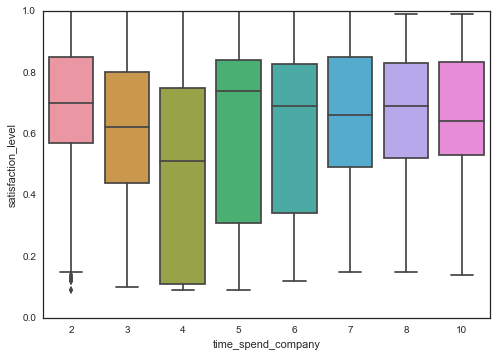

In [133]:
sns.boxplot(data=df, 
            x = "time_spend_company",
            y = "satisfaction_level", )


# Multiple Histograms 

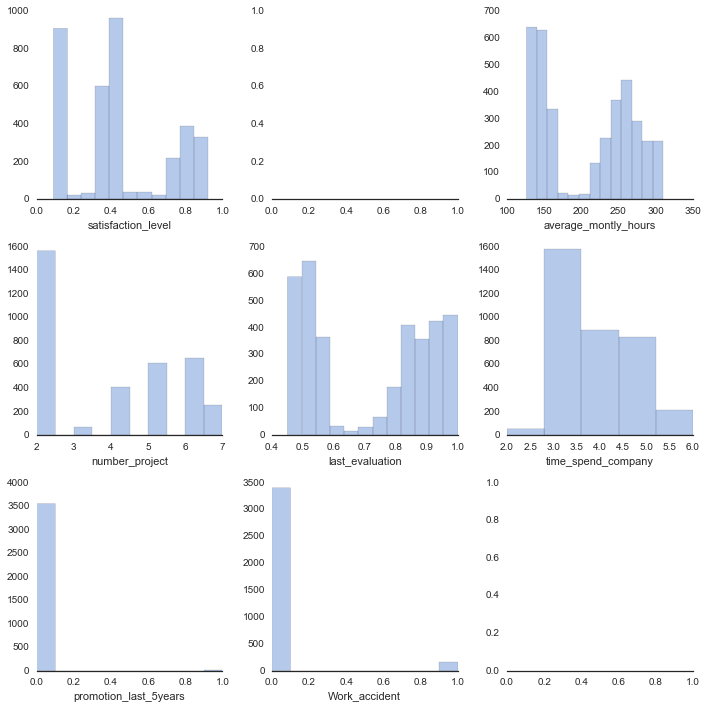

In [134]:

sns.set(style="white", palette="muted", color_codes=True)
# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(10,10))
sns.despine(left=True)

#people that left
leavers = data.loc[data['left'] == 1]
# Plot a simple histogram with binsize determined automatically
sns.distplot(leavers['satisfaction_level'], kde=False, color="b", ax=axes[0,0], color=)
#sns.distplot(leavers['salary'], bins=3, kde=False, color="b", ax=axes[0, 1])
sns.distplot(leavers['average_montly_hours'], kde=False, color="b", ax=axes[0, 2])
sns.distplot(leavers['number_project'], kde=False, color="b", ax=axes[1,0])
sns.distplot(leavers['last_evaluation'], kde=False, color="b", ax=axes[1, 1])
sns.distplot(leavers['time_spend_company'], kde=False, bins=5, color="b", ax=axes[1, 2])
sns.distplot(leavers['promotion_last_5years'],bins=10, kde=False, color="b", ax=axes[2,0])
sns.distplot(leavers['Work_accident'], bins=10,kde=False, color="b", ax=axes[2, 1])

plt.tight_layout()